In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [11]:
%matplotlib inline

In [28]:
full_data = pd.read_csv("data/train.csv", sep=",")
full_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [29]:
!cat data/data_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM


* Utilities - Check skewness
* Landslope - Skewness
* Condition2 - Check if most are 'Normal' - Check if it can be clubbed with condition1
* OverallQual - Check Significance
* OverallCond - Check sig
* YearBuilt + YearRemodAdd + Overallcond - General age + quality of the house
* RoofMat - Check corr with overallQual
* Exterior1st - Check corr with overallQual
* Exterior2nd - Check availability of data
* ExteriorQual + OverallQual check?
* ExterCond - Check significance. Can be clubbed with interior cond or over condition
* Foundation - Check significance
* BasementQual + BasementCond - Check skew and significance
* Bsmt - Check all vars
* HeatingQC - Overall cond
* KitchenQual - Overall quality
* Bedroom, TotRmsAbvGrd - Combined: Bedrooms per room
* GarageCars, GarageArea - Can be combined
* GarageQual - Overall Qual
* GarageQual + GarageCond - Check relation
* PoolQC, FenceQC
* MiscVal
* MoSold, YrSold

In [43]:
X = full_data.drop("SalePrice", axis=1).drop("Id", axis=1)
Y = full_data["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [44]:
description = pd.DataFrame(X_train.describe())
description

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1168.000000,951.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1162.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.849315,70.343849,10689.642123,6.121575,5.584760,1970.965753,1984.897260,103.771945,446.023973,45.152397,...,476.273973,95.946918,49.578767,21.839041,3.812500,15.407534,2.955479,51.267123,6.356164,2007.818493
std,42.531862,24.897021,10759.366198,1.367619,1.116062,30.675495,20.733955,173.032238,459.070977,158.217499,...,211.095373,129.685939,69.433580,62.083227,31.519664,55.881148,41.648504,553.039684,2.670707,1.322639
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7587.250000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,...,341.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,70.000000,9600.000000,6.000000,5.000000,1972.000000,1994.000000,0.000000,384.500000,0.000000,...,482.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11700.000000,7.000000,6.000000,2001.000000,2004.000000,166.000000,721.000000,0.000000,...,576.000000,168.000000,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,5644.000000,1127.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Data columns (total 79 columns):
MSSubClass       1168 non-null int64
MSZoning         1168 non-null object
LotFrontage      951 non-null float64
LotArea          1168 non-null int64
Street           1168 non-null object
Alley            74 non-null object
LotShape         1168 non-null object
LandContour      1168 non-null object
Utilities        1168 non-null object
LotConfig        1168 non-null object
LandSlope        1168 non-null object
Neighborhood     1168 non-null object
Condition1       1168 non-null object
Condition2       1168 non-null object
BldgType         1168 non-null object
HouseStyle       1168 non-null object
OverallQual      1168 non-null int64
OverallCond      1168 non-null int64
YearBuilt        1168 non-null int64
YearRemodAdd     1168 non-null int64
RoofStyle        1168 non-null object
RoofMatl         1168 non-null object
Exterior1st      1168 non-null object
Exterior2nd      1168 non

In [37]:
all_cols = X_train.columns
object_cols = X_train.select_dtypes(include=["object"])
not_object_cols = list(set(all_cols) - set(object_cols))

for key in object_cols:
    print(key)
    print(X_train[key].value_counts())
    print("-"*50)

MSZoning
RL         924
RM         172
FV          53
RH          15
C (all)      4
Name: MSZoning, dtype: int64
--------------------------------------------------
Street
Pave    1164
Grvl       4
Name: Street, dtype: int64
--------------------------------------------------
Alley
Grvl    44
Pave    30
Name: Alley, dtype: int64
--------------------------------------------------
LotShape
Reg    729
IR1    394
IR2     37
IR3      8
Name: LotShape, dtype: int64
--------------------------------------------------
LandContour
Lvl    1059
Bnk      48
HLS      35
Low      26
Name: LandContour, dtype: int64
--------------------------------------------------
Utilities
AllPub    1167
NoSeWa       1
Name: Utilities, dtype: int64
--------------------------------------------------
LotConfig
Inside     822
Corner     221
CulDSac     84
FR2         38
FR3          3
Name: LotConfig, dtype: int64
--------------------------------------------------
LandSlope
Gtl    1108
Mod      51
Sev       9
Name: LandS

#### Uniform
* Neighborhood
* HouseStyle
* Exterior1st
* Exterior2nd
* MasVnrType
* Foundation(2 categories)
* BsmtQual (2 categories)
* BsmtFinType1


* BsmtExposure
* HeatingQC
* KitchenQual
* FireplaceQu
* GarageType
* GarageFinish

#### Skewed
* MSZoning - Skewed to RL - Check significance
* Street -  Skewed to Pave - Check sig
* LotShape - IR2, IR3 few vals
* LandContour - Skewed Lvl
* Utilities - Skewed AllPub. Only 1 NoSeWa
* LotConfig - Skewed
* LandSlope - skewed
* Condition1 - skewed
* Condition2 - Highly skewed
* ExtrQual
* ExtrCond
* BsmtCond
* BsmtFinType2
* Heating
* CentralAir
* Electrical
* Functional
* GarageQual
* PavedDrive
* SaleType
* SaleCondition

#### Too few values
* Alley - Too few values(50+41)
* PoolQC
* Fence
* MiscFeature



MSZoning


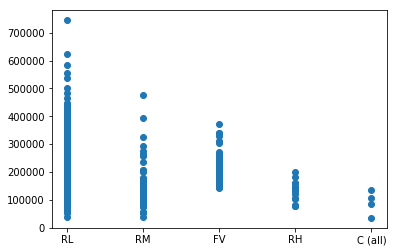

--------------------------------------------------
Street


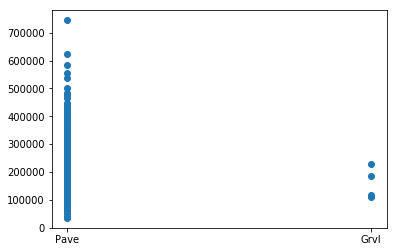

--------------------------------------------------
Alley
could not convert string to float: 'Pave'
Unable to plot
--------------------------------------------------
LotShape


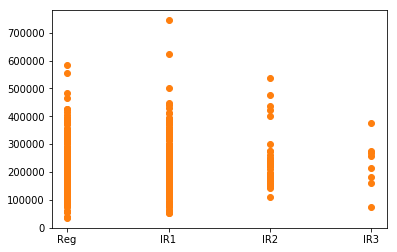

--------------------------------------------------
LandContour


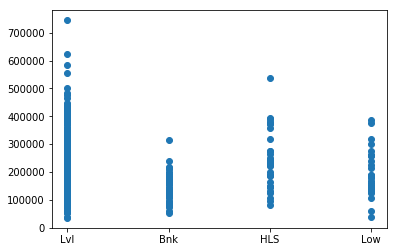

--------------------------------------------------
Utilities


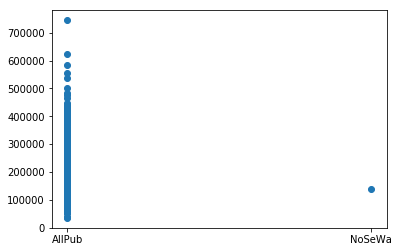

--------------------------------------------------
LotConfig


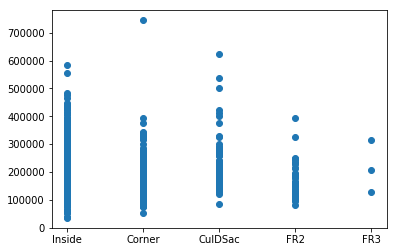

--------------------------------------------------
LandSlope


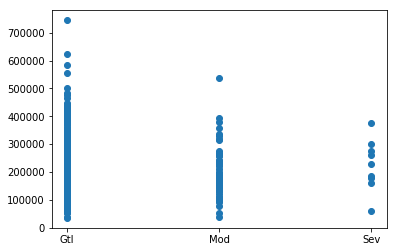

--------------------------------------------------
Neighborhood


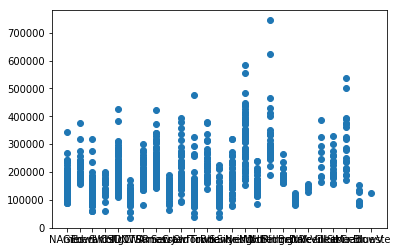

--------------------------------------------------
Condition1


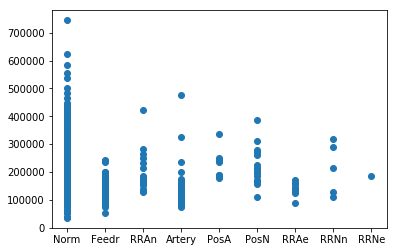

--------------------------------------------------
Condition2


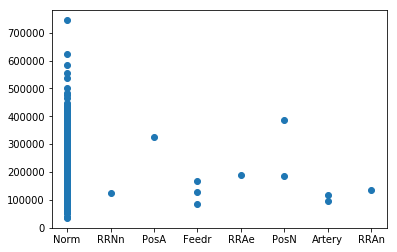

--------------------------------------------------
BldgType


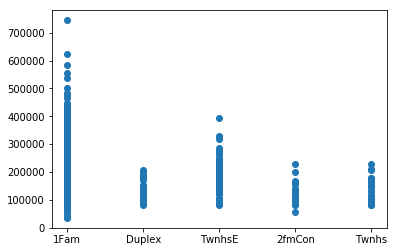

--------------------------------------------------
HouseStyle


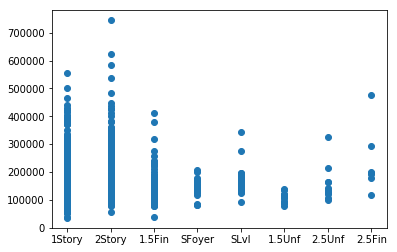

--------------------------------------------------
RoofStyle


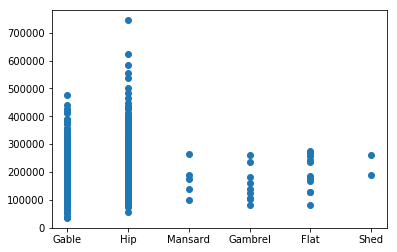

--------------------------------------------------
RoofMatl


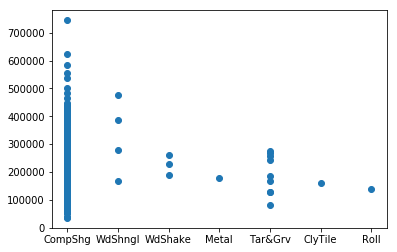

--------------------------------------------------
Exterior1st


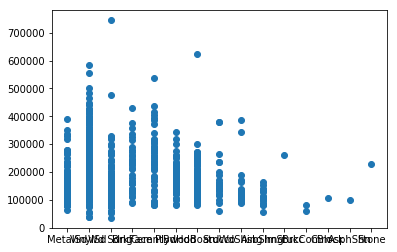

--------------------------------------------------
Exterior2nd


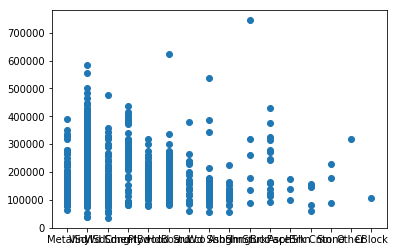

--------------------------------------------------
MasVnrType
nan is not a string
Unable to plot
--------------------------------------------------
ExterQual
'NoneType' object has no attribute 'update'
Unable to plot
--------------------------------------------------
ExterCond
'NoneType' object has no attribute 'update'
Unable to plot
--------------------------------------------------
Foundation
'NoneType' object has no attribute 'update'
Unable to plot
--------------------------------------------------
BsmtQual
'NoneType' object has no attribute 'update'
Unable to plot
--------------------------------------------------
BsmtCond
'NoneType' object has no attribute 'update'
Unable to plot
--------------------------------------------------
BsmtExposure
'NoneType' object has no attribute 'update'
Unable to plot
--------------------------------------------------
BsmtFinType1
'NoneType' object has no attribute 'update'
Unable to plot
--------------------------------------------------
BsmtFin

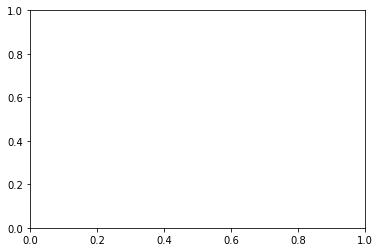

In [39]:
for key in object_cols:
    print(key)
    try:
        plt.scatter(X_train[key], y_train)
        plt.show()
    except Exception as e:
        print(e)
        print("Unable to plot")
    print("-"*50)

#### Observations
**Skewed**
* Street
* Alley
* Utilities
* Condition2
* RoofStyle
* RoofMat

**Check**
* MSZoning
* LotShape
* LandContour
* LotConfig
* LandSlope
* Condition1
* Exterior1st
* Exterior2nd

**Use**
* Neighborhood
* BldgType
* HouseStyle



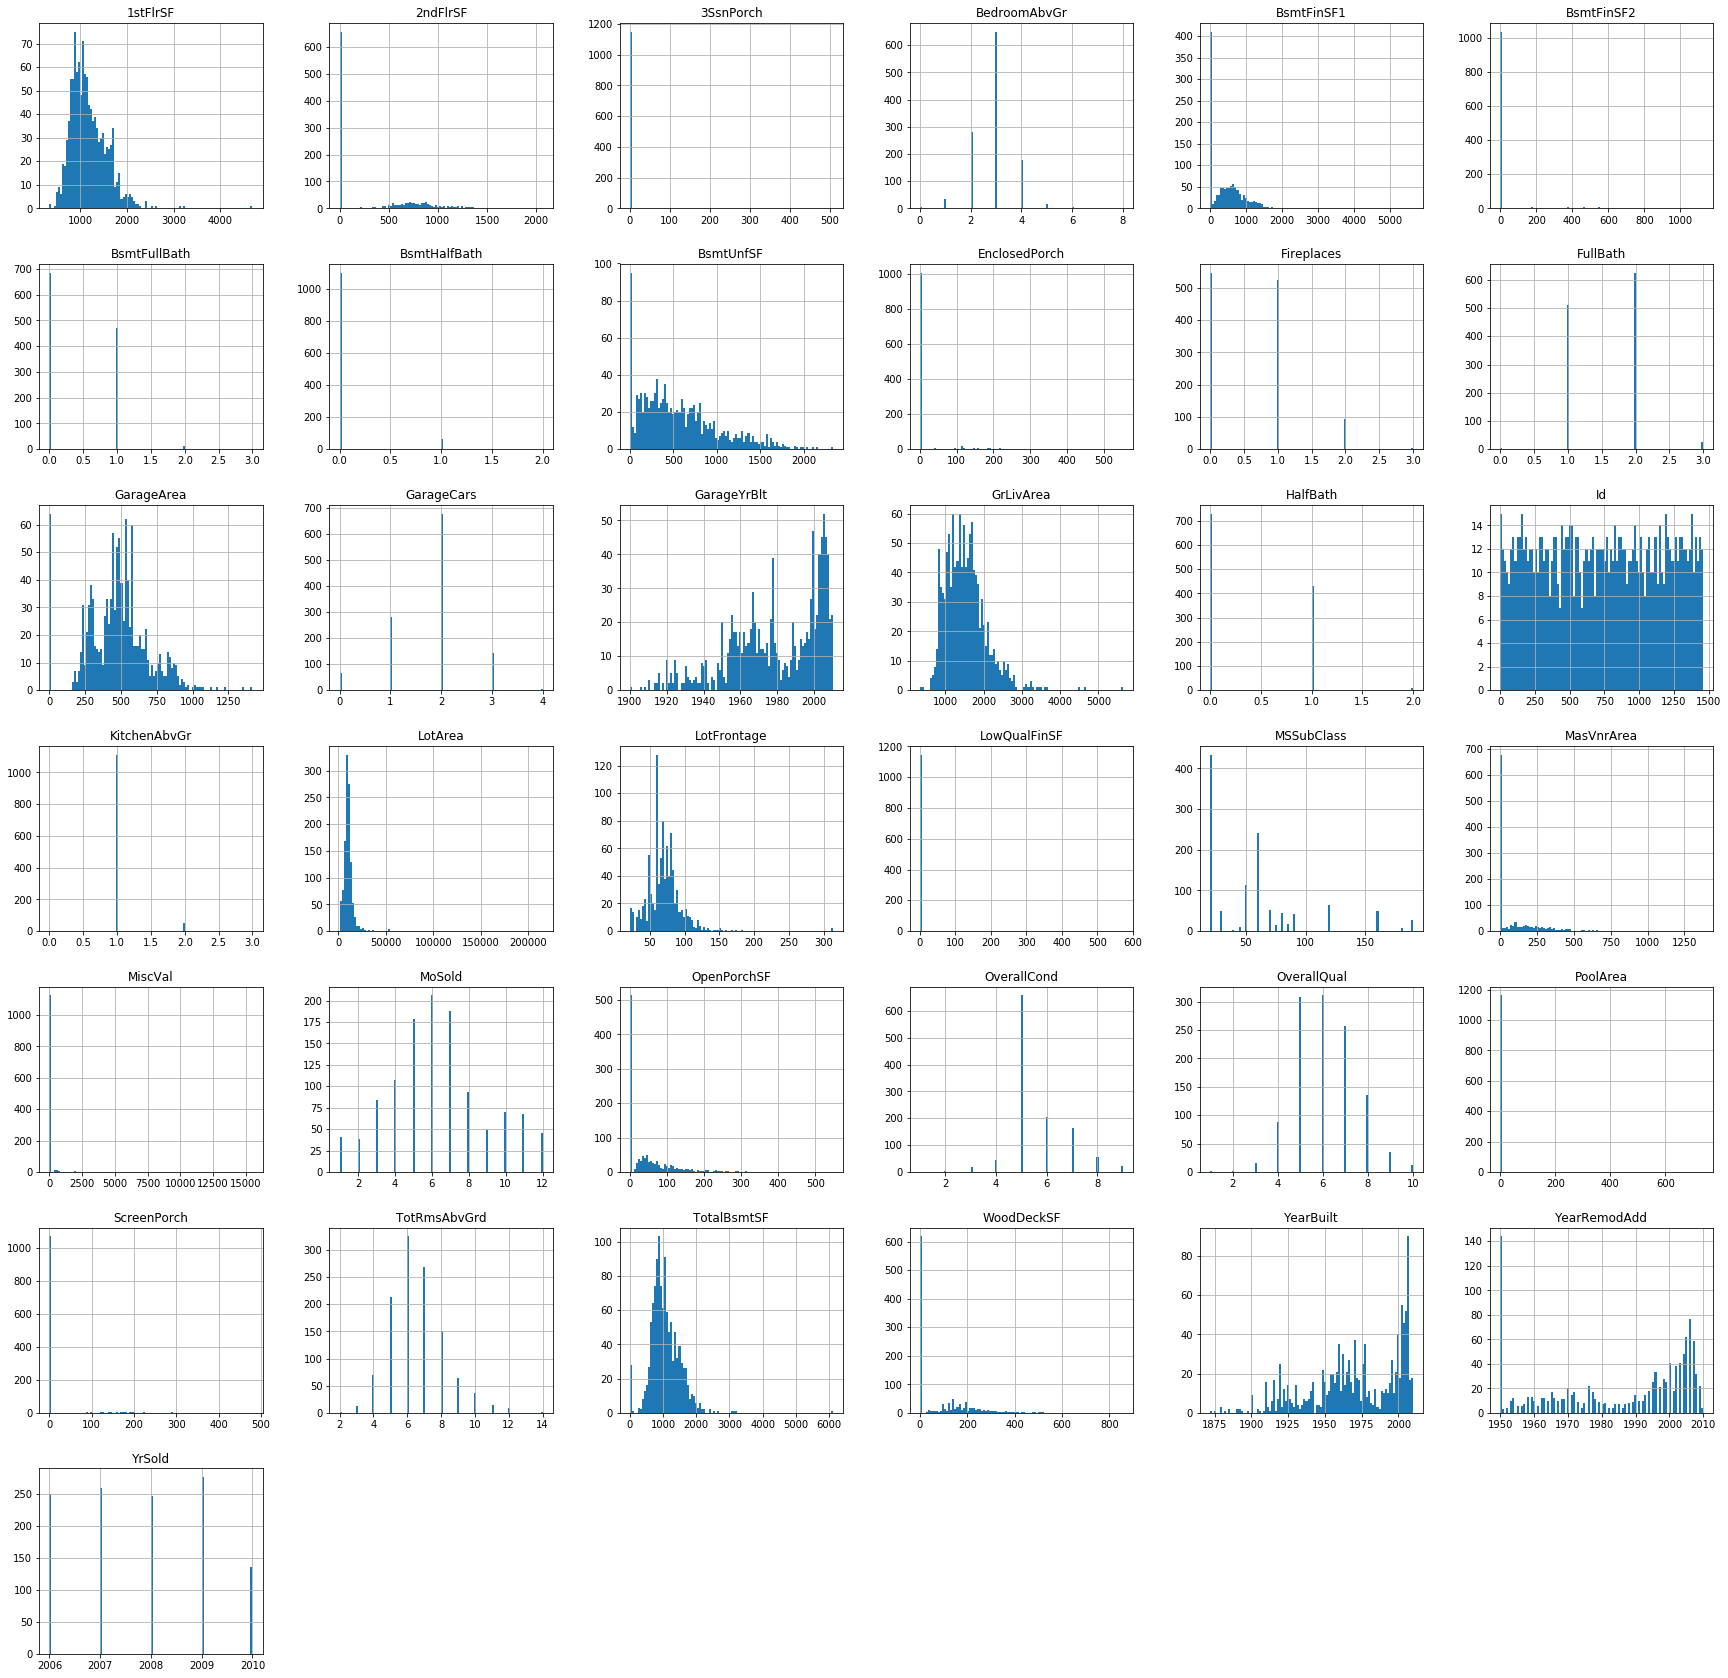

In [40]:

import matplotlib.pyplot as plt

X_train[not_object_cols].hist(bins=100, figsize=(30,30))
plt.show()

#### Scatter plots

BedroomAbvGr


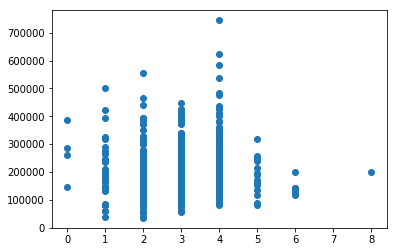

--------------------------------------------------
GarageCars


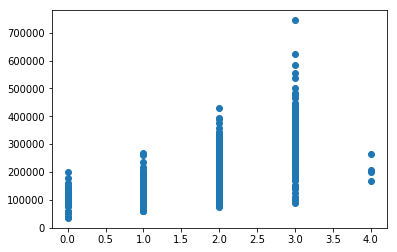

--------------------------------------------------
LotFrontage


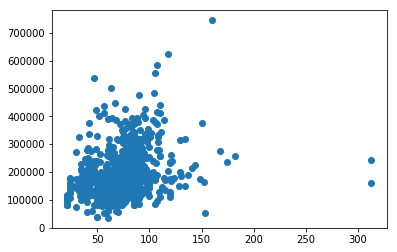

--------------------------------------------------
YrSold


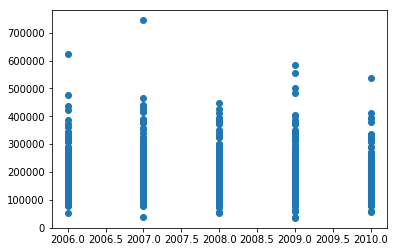

--------------------------------------------------
OverallQual


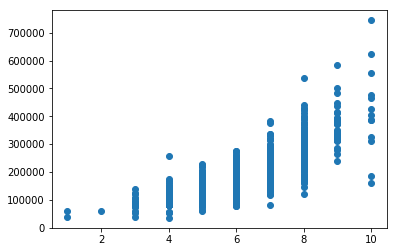

--------------------------------------------------
HalfBath


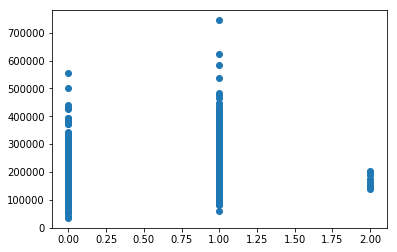

--------------------------------------------------
LotArea


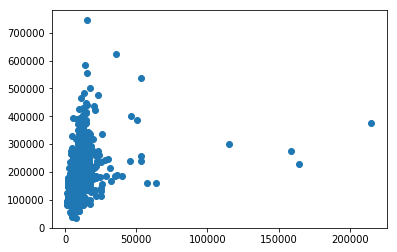

--------------------------------------------------
GarageYrBlt


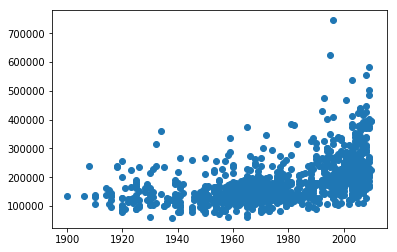

--------------------------------------------------
1stFlrSF


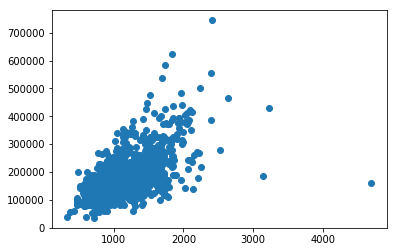

--------------------------------------------------
BsmtHalfBath


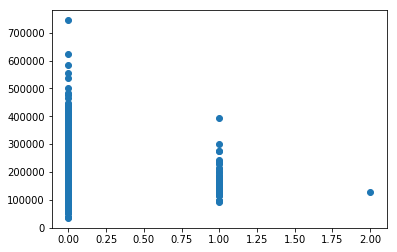

--------------------------------------------------
FullBath


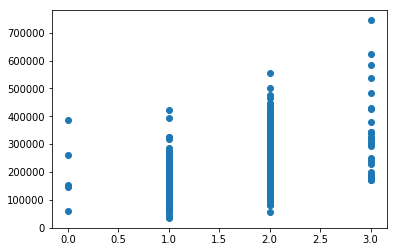

--------------------------------------------------
OverallCond


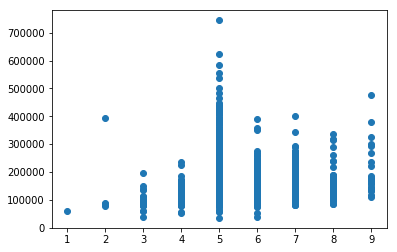

--------------------------------------------------
BsmtFullBath


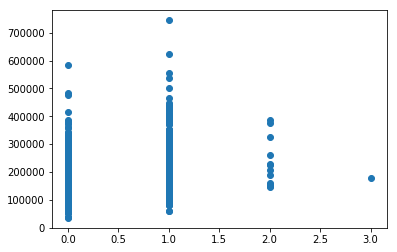

--------------------------------------------------
TotRmsAbvGrd


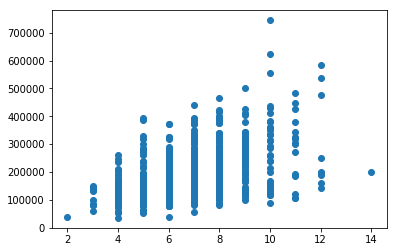

--------------------------------------------------
2ndFlrSF


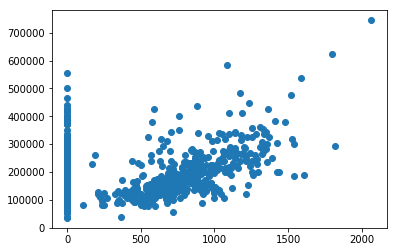

--------------------------------------------------
GarageArea


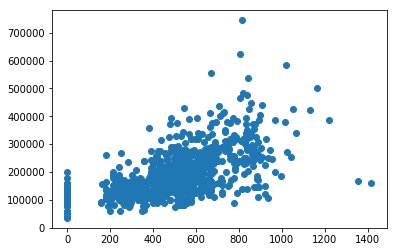

--------------------------------------------------
Fireplaces


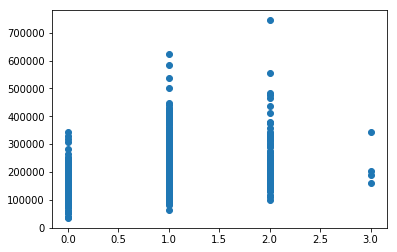

--------------------------------------------------
BsmtUnfSF


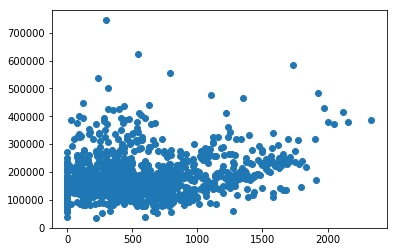

--------------------------------------------------
ScreenPorch


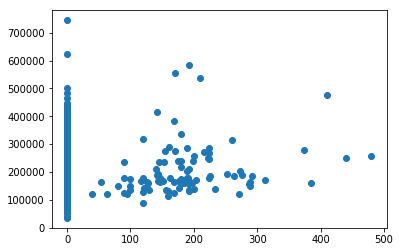

--------------------------------------------------
OpenPorchSF


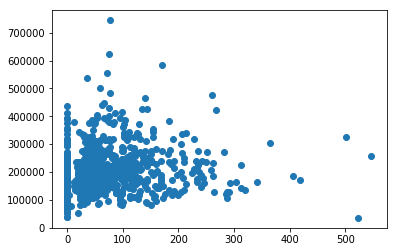

--------------------------------------------------
Id


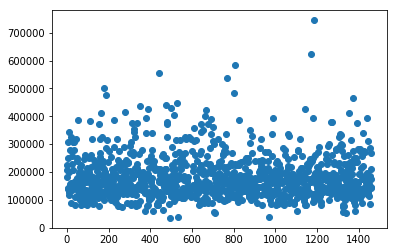

--------------------------------------------------
MasVnrArea


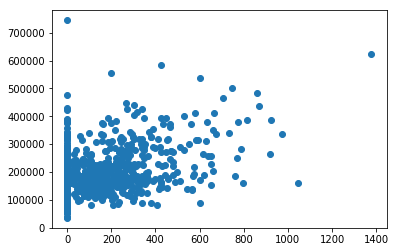

--------------------------------------------------
BsmtFinSF2


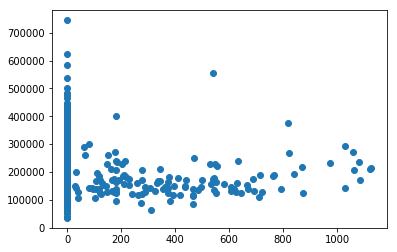

--------------------------------------------------
EnclosedPorch


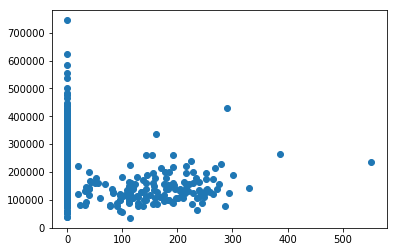

--------------------------------------------------
MSSubClass


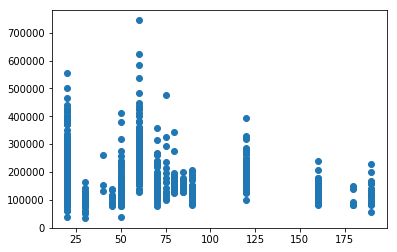

--------------------------------------------------
WoodDeckSF


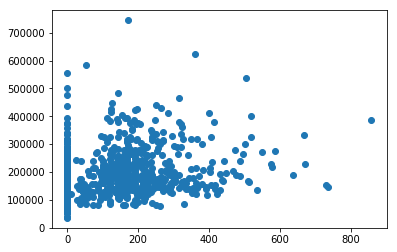

--------------------------------------------------
MiscVal


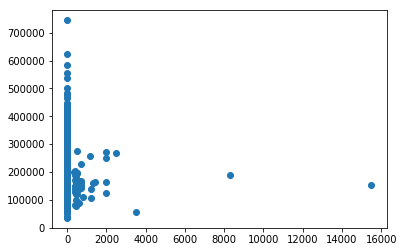

--------------------------------------------------
GrLivArea


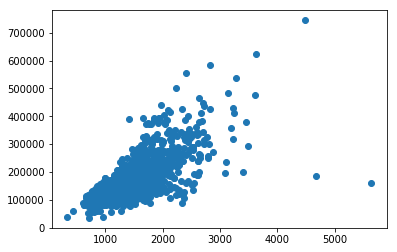

--------------------------------------------------
YearRemodAdd


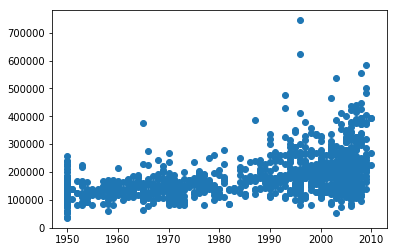

--------------------------------------------------
YearBuilt


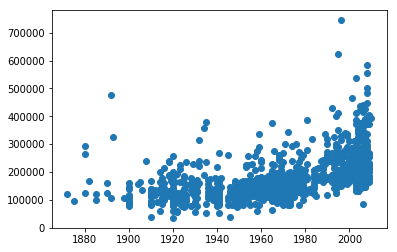

--------------------------------------------------
MoSold


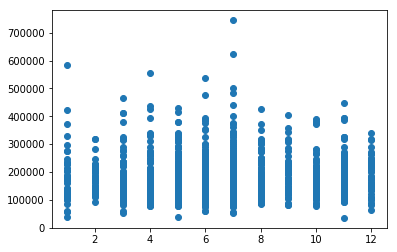

--------------------------------------------------
BsmtFinSF1


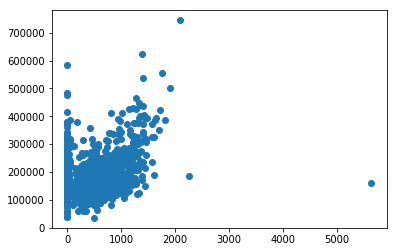

--------------------------------------------------
LowQualFinSF


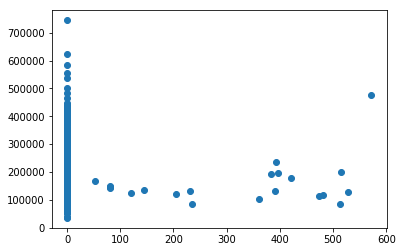

--------------------------------------------------
3SsnPorch


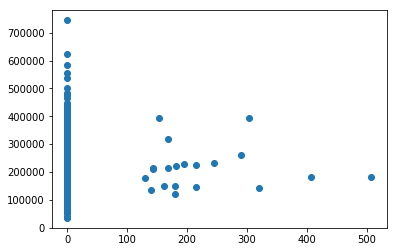

--------------------------------------------------
PoolArea


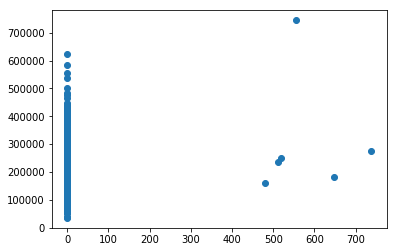

--------------------------------------------------
TotalBsmtSF


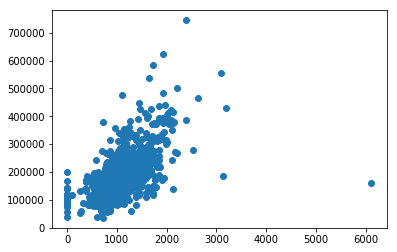

--------------------------------------------------
KitchenAbvGr


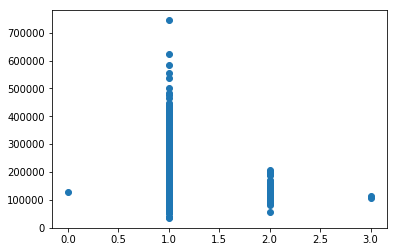

--------------------------------------------------


In [41]:
for key in not_object_cols:
    print(key)
    try:
        plt.scatter(X_train[key], y_train)
        plt.show()
    except Exception as e:
        print(e)
        print("Unable to plot")
    print("-"*50)

#### Observations
**Skewed**
* BsmtHalfBath

**Check**
* BedroomAbvGr
* HalfBath
* LotArea
* FullBath
* OverallCond
* BsmtFullBath
* Fireplaces
* WoodDeckSF 
* MoSold
* BsmtFinSF1

**Use**
* GrLivArea
* GarageCars
* LotFrontage
* OverallQual
* GarageYrBlt
* 1stFlrSF
* 2ndFlrSF
* TotRmsAbvGrd
* GarageArea
* MasVnrArea
* YearBuilt
* TotalBsmtSF